In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10


(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()


313/313 [==============================] - 4s 14ms/step - loss: 0.7536 - accuracy: 0.7576

Test Accuracy (Optimizer: adam, Regularizer: None): 0.7576
Test Loss (Optimizer: adam, Regularizer: None): 0.7536
313/313 [==============================] - 5s 15ms/step - loss: 2.6526 - accuracy: 0.1000

Test Accuracy (Optimizer: adam, Regularizer: <keras.src.regularizers.L1 object at 0x1575d8f50>): 0.1000
Test Loss (Optimizer: adam, Regularizer: <keras.src.regularizers.L1 object at 0x1575d8f50>): 2.6526
313/313 [==============================] - 4s 13ms/step - loss: 2.3026 - accuracy: 0.1000

Test Accuracy (Optimizer: adam, Regularizer: <keras.src.regularizers.L2 object at 0x157e1a610>): 0.1000
Test Loss (Optimizer: adam, Regularizer: <keras.src.regularizers.L2 object at 0x157e1a610>): 2.3026
313/313 [==============================] - 4s 13ms/step - loss: 0.9276 - accuracy: 0.6887

Test Accuracy (Optimizer: sgd, Regularizer: None): 0.6887
Test Loss (Optimizer: sgd, Regularizer: None): 0.9276
31

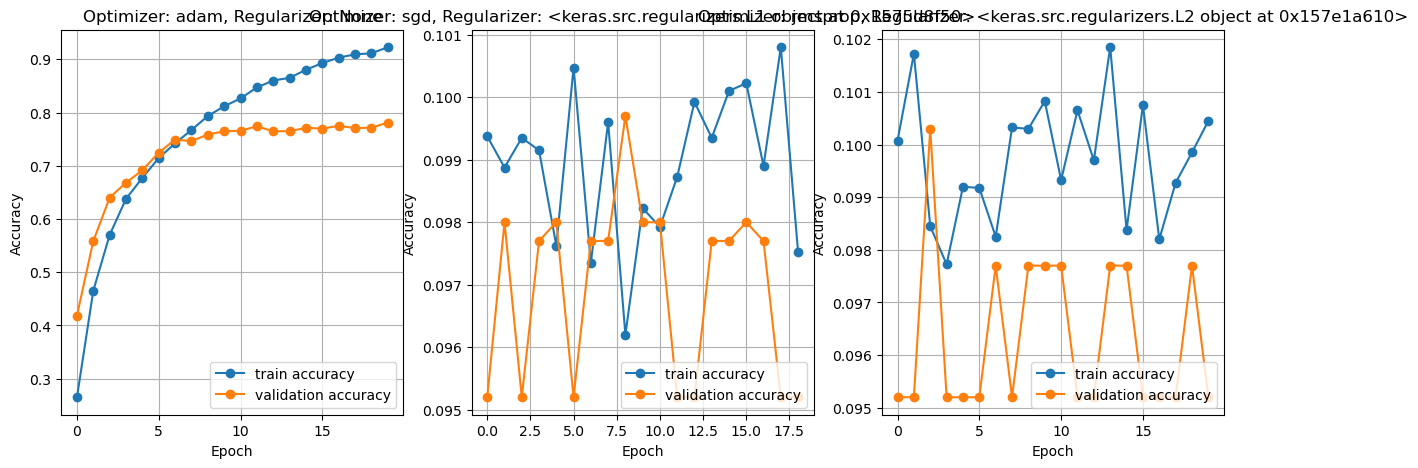

1/1 [==============================] - 0s 8ms/step


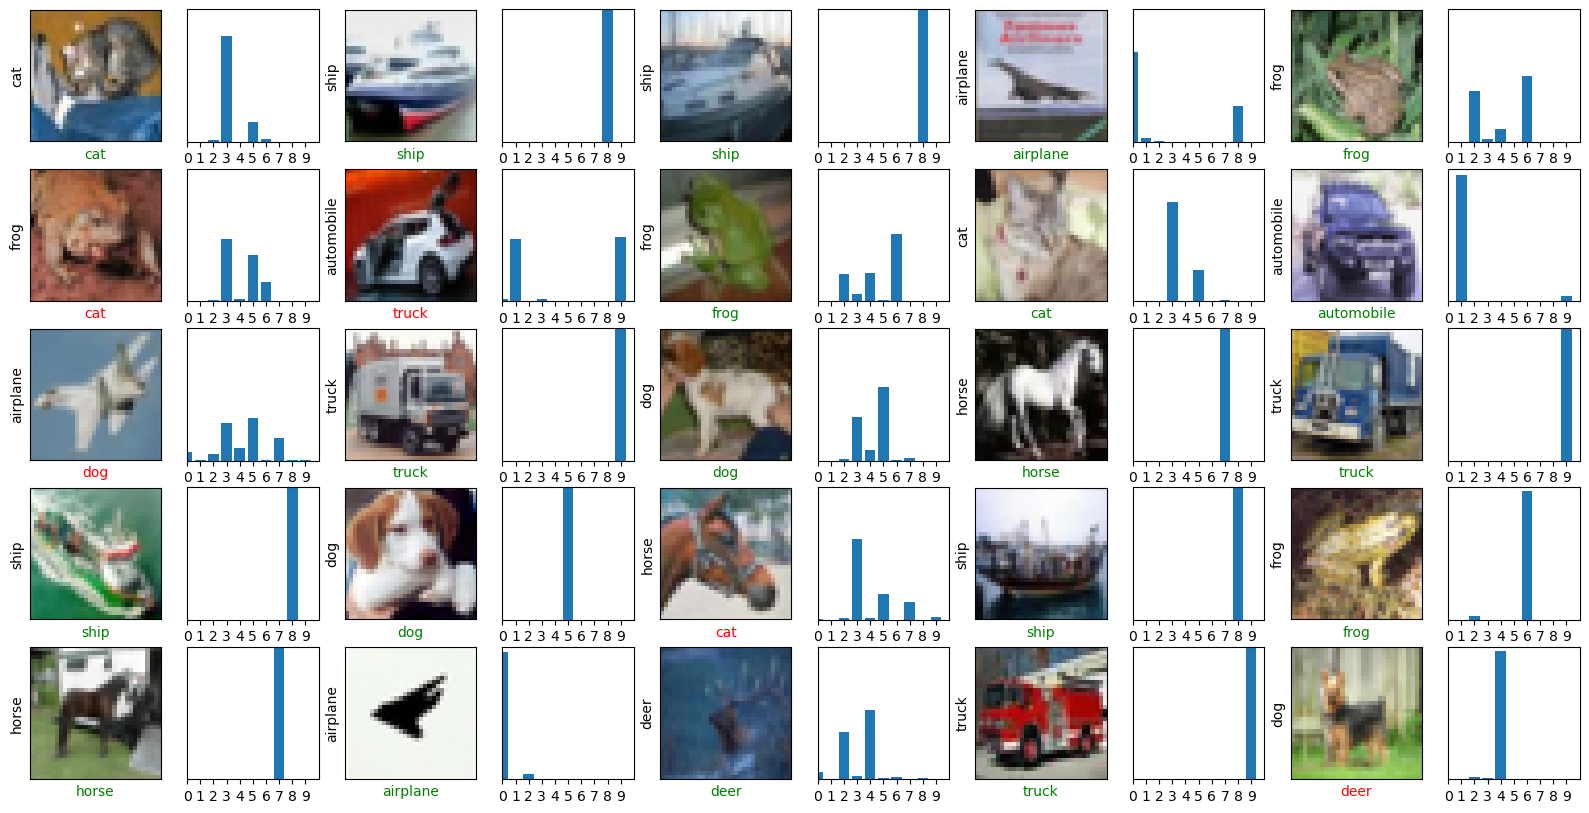

In [3]:

from tensorflow.keras import layers, regularizers

import numpy as np
import matplotlib.pyplot as plt

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

X_train, X_test = X_train / 255.0, X_test / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def create_and_train_model(optimizer='adam', regularizer=None, epochs=100):
    model = tf.keras.Sequential([
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizer, input_shape=(32, 32, 3)),
        layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizer),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizer),
        layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizer),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizer),
        layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizer),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    history = model.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=128, callbacks=[early_stop], verbose=0)
    
    test_loss, test_acc = model.evaluate(X_test, Y_test)
    print(f'\nTest Accuracy (Optimizer: {optimizer}, Regularizer: {regularizer}): {test_acc:.4f}')
    print(f'Test Loss (Optimizer: {optimizer}, Regularizer: {regularizer}): {test_loss:.4f}')
    
    return model, history

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

epochs = 100

models = []
histories = []

optimizers = ['adam', 'sgd', 'rmsprop']
regularizers = [None, regularizers.l1(0.01), regularizers.l2(0.01)]

for optimizer in optimizers:
    for regularizer in regularizers:
        model, history = create_and_train_model(optimizer=optimizer, regularizer=regularizer, epochs=epochs)
        models.append(model)
        histories.append(history)

plt.figure(figsize=(15, 5))
for i, (optimizer, regularizer) in enumerate(zip(optimizers, regularizers)):
    plt.subplot(1, 3, i + 1)
    plt.plot(histories[i].history['accuracy'], 'o-', label='train accuracy')
    plt.plot(histories[i].history['val_accuracy'], 'o-', label='validation accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.title(f'Optimizer: {optimizer}, Regularizer: {regularizer}')
    plt.legend(loc='lower right')
plt.show()


rows = 5
cols = 5

plt.figure(figsize=(20, 10))
for i in range(rows * cols):
    plt.subplot(rows, 2 * cols, 2 * i + 1)
    plt.imshow(X_test[i])
    plt.xticks([])
    plt.yticks([])
    plt.ylabel(class_names[Y_test[i][0]])
    predicted_label = np.argmax(models[0].predict(np.expand_dims(X_test[i], axis=0)))
    color = 'g' if Y_test[i][0] == predicted_label else 'r'
    plt.xlabel(class_names[predicted_label], color=color)

    plt.subplot(rows, 2 * cols, 2 * i + 2)
    plt.bar(range(10), models[0].predict(np.expand_dims(X_test[i], axis=0))[0])
    plt.yticks([])
    plt.xticks(range(10))
    plt.ylim([0, 1])
    plt.xlim([0, 10])

plt.show()
